# Lesson 09 - Flow over a cylinder with Source Panels 

We have used flow singularities to represent simple gemometries (Rankine Oval) or circular cylinder immersed in a freestream 

What isf we want to represent an arbitrary geometry? We will learn that in this lesson. This method consists of representing geometry of a body by a series of linear segments or panels that correspond to source sheets 



In [1]:
import math
import numpy 
from scipy import integrate 
from matplotlib import pyplot
# embed those figures 
%matplotlib inline 

In [3]:
u_inf = 1.0 #freestream 


## Defing the geometry 

We want a circular cylinder of unit radius 

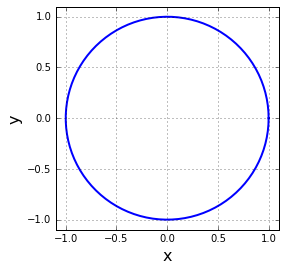

In [6]:
#define the cylinder 
R = 1.0 
theta = numpy.linspace(0, 2*math.pi, 100)
x_cylinder, y_cylinder = R*numpy.cos(theta), R*numpy.sin(theta)

#plot the cylinder 
size =4
pyplot.figure(figsize = (size,size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize =16)
pyplot.plot(x_cylinder, y_cylinder, color = 'b', linestyle = '-', linewidth = 2)
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);

## Discretization into panels 

A panel is represented by the two end points (xa, ya) and (xb, yb) and its strength sigma. The orientaton is defined by angle between the x-axis and the normal in a counter-clockwise sense 

In [7]:
class Panel: 
    """
    contains info related to a panel 
    """
    def __init__(self, xa, ya, xb, yb):
        """
        Initialized the panel 
        
        Sets the end-points and calculated the center, length, and angle 
        (with the x-axis) of the panel 
        Initializes the strength of the source-sheet, the tangential velocity, 
        and the pressure coefficient to zeo
        
        Parameters
        _----------
        xa (float): x-coordinate of the first end-point 
        ya (float): y-coordinate of the first end point 
        xb (float): x-coordinate of the second end-point 
        yb (float): y-coordinate of the second end point 
        """
        self.xa, self.ya = xa, ya 
        self.xb, self.yb = xb, yb 
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2  # control point (center point)
        self.length = math.sqrt((xb-xa)**2+ (yb-ya)**2)  #length of the panel 
        
        # orientation of the panel (angle between x-axis and panel's normal)
        if xb-xa <=0.: 
            self.beta= math.acos((yb-ya)/self.length)
        elif xb-xa > 0.: 
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
        
        self.sigma = 0. 
        self.vt = 0. 
        self.cp = 0. 
        
        

In [8]:
N_panels =10  # number of panels desired 